In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
from vega_datasets import data
from io import BytesIO
from scipy.linalg import solve
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10, 5)



<Axes: xlabel='date'>

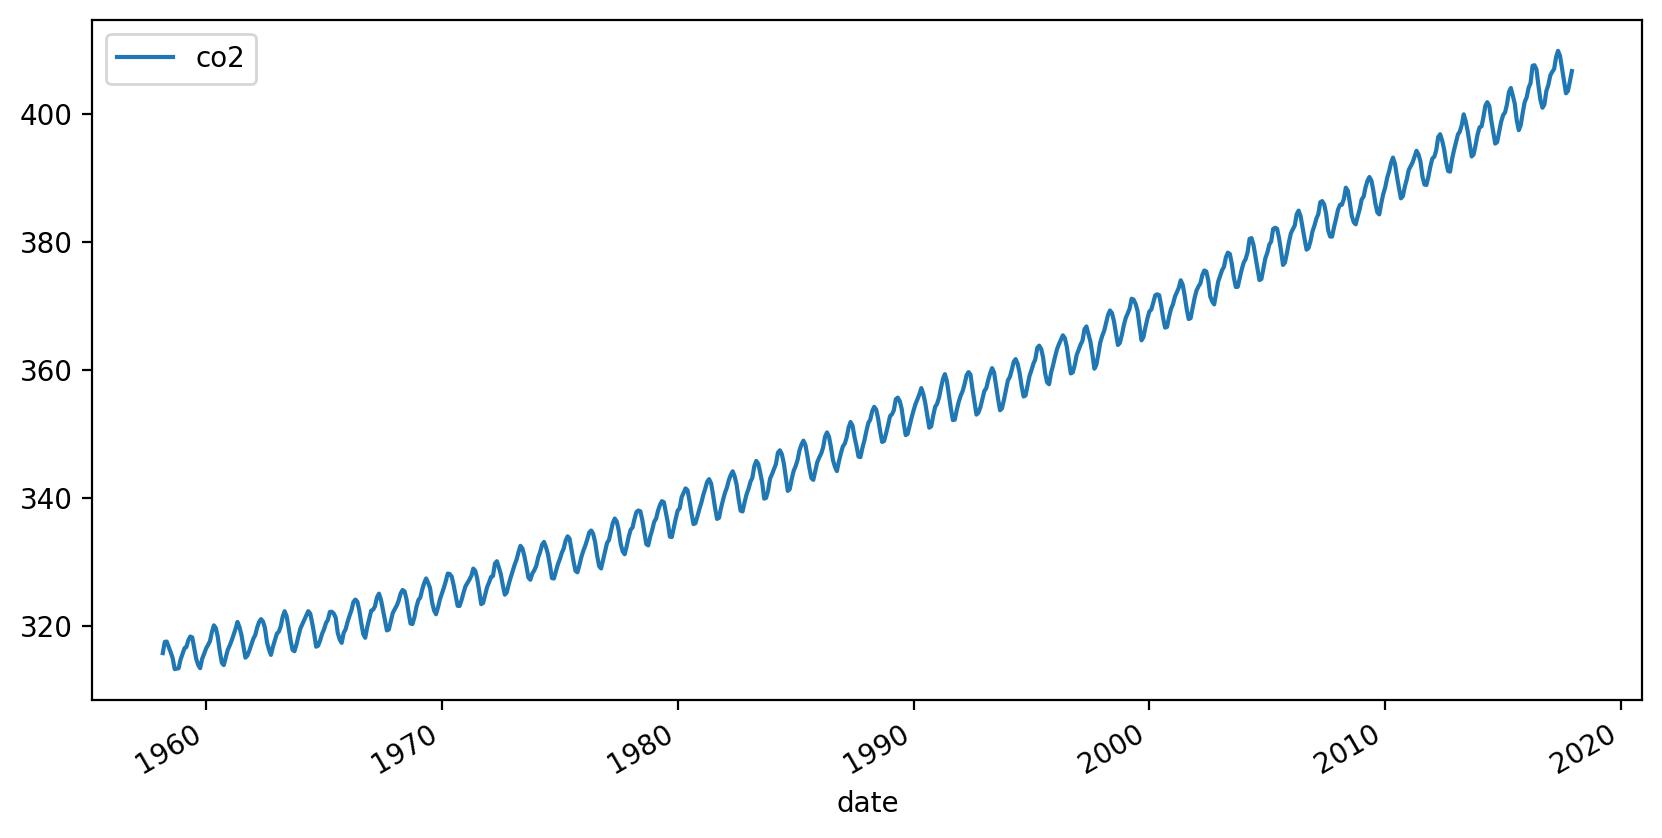

: 

: 

In [ ]:
co2 = pd.read_csv(BytesIO(data.co2_concentration.raw()))

co2.columns = co2.columns.str.lower()
co2 = co2.assign(date=lambda f: f["date"].pipe(pd.to_datetime))

co2.set_index("date").plot()

In [ ]:
def standardize(col):
    return col.sub(col.mean()).div(col.std())


dataset = co2.assign(
    year=lambda f: f["date"].dt.year.astype(float),
    month=lambda f: f["date"].dt.month.astype(float),
    year_2=lambda f: f["year"].pipe(standardize).pow(2),
    cos_month=lambda f: f["month"].pipe(lambda s: np.cos(s * 2 * np.pi / 12)),
    sin_month=lambda f: f["month"].pipe(lambda s: np.sin(s * 2 * np.pi / 12)),
).set_index("date")


dataset

,co2,year,month,year_2,cos_month,sin_month
date,,,,,,
1958-03-01,315.70,1958.0,3.0,2.992961,6.123234e-17,1.000000e+00
1958-04-01,317.46,1958.0,4.0,2.992961,-5.000000e-01,8.660254e-01
1958-05-01,317.51,1958.0,5.0,2.992961,-8.660254e-01,5.000000e-01
1958-07-01,315.86,1958.0,7.0,2.992961,-8.660254e-01,-5.000000e-01
1958-08-01,314.93,1958.0,8.0,2.992961,-5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...
2017-08-01,405.24,2017.0,8.0,2.887568,-5.000000e-01,-8.660254e-01
2017-09-01,403.27,2017.0,9.0,2.887568,-1.836970e-16,-1.000000e+00
2017-10-01,403.64,2017.0,10.0,2.887568,5.000000e-01,-8.660254e-01


: 

: 

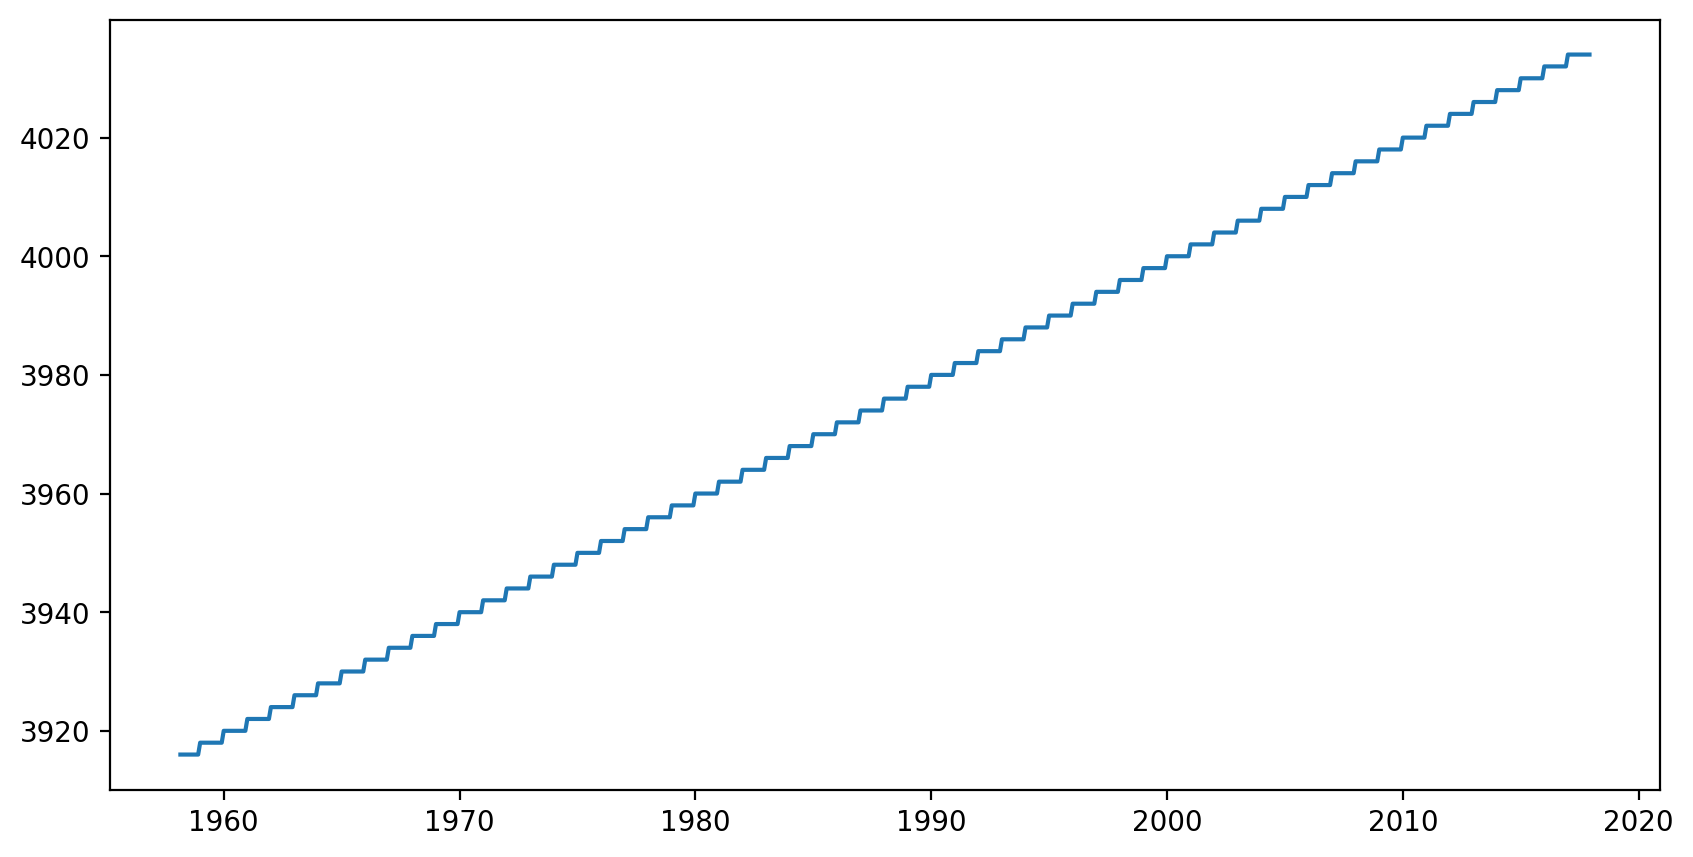

: 

: 

In [ ]:
def apply(params, x):
    return x @ params[1:] + params[0]


params = [0.0, 2.0]
res = apply(params, dataset[["year"]].to_numpy())

plt.plot(dataset.index, res)

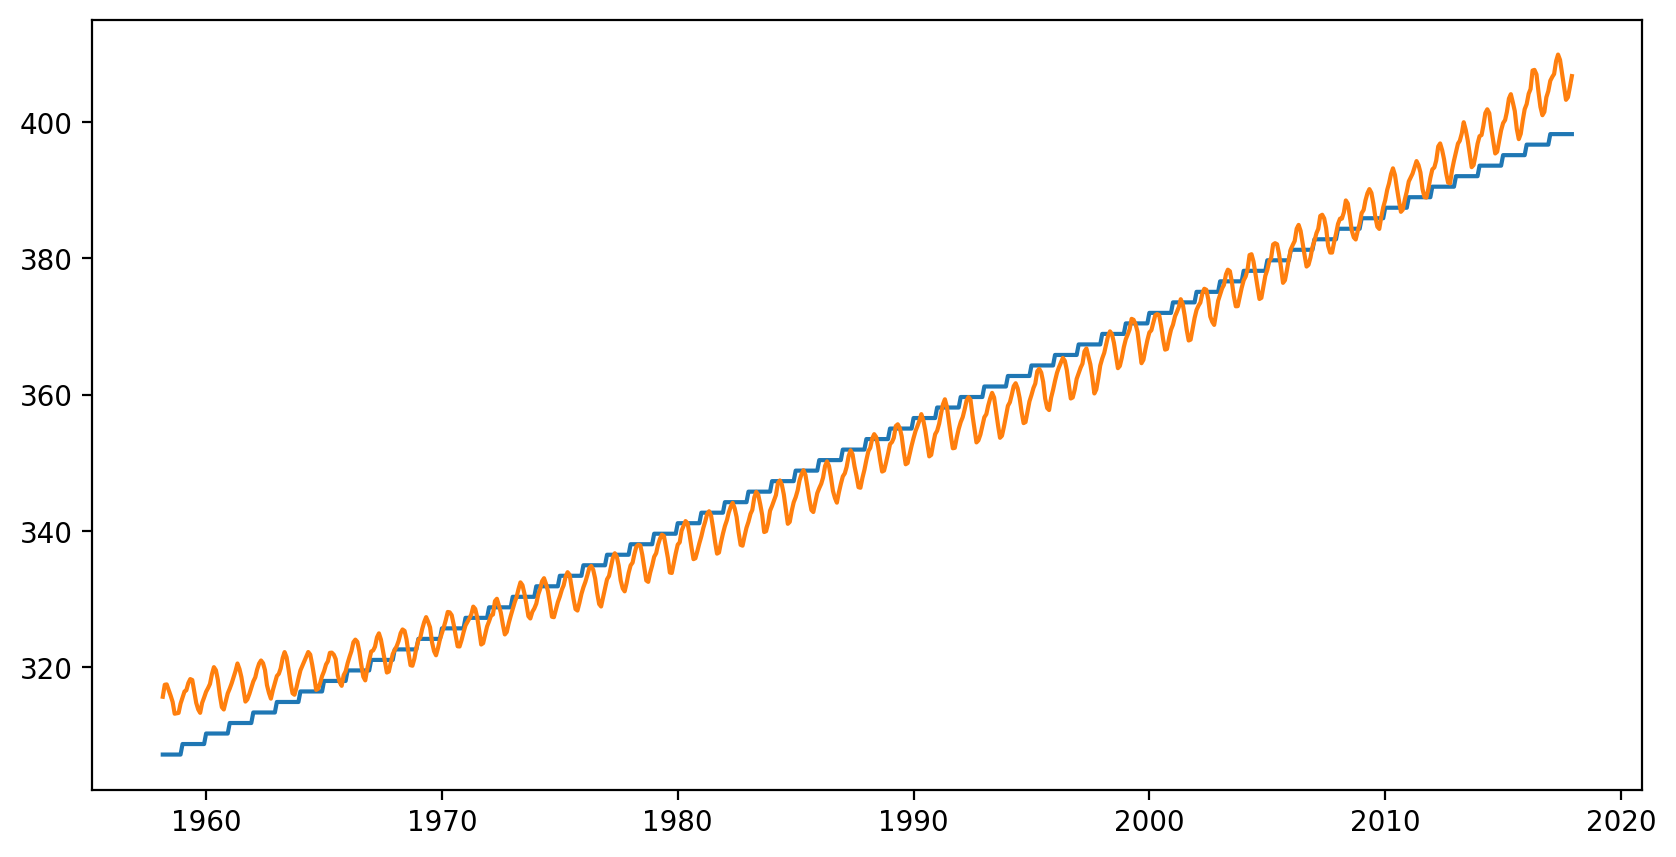

: 

: 

In [ ]:
def ols(x, y, reg=0):
    x = np.hstack((np.ones_like(x[:, [0]]), x))
    return solve(x.T @ x + reg * np.eye(x.shape[1]), x.T @ y)


x = dataset[["year"]].to_numpy()
y = dataset["co2"].to_numpy()

weights = ols(x, y)

plt.plot(dataset.index, apply(weights, x), dataset["co2"])

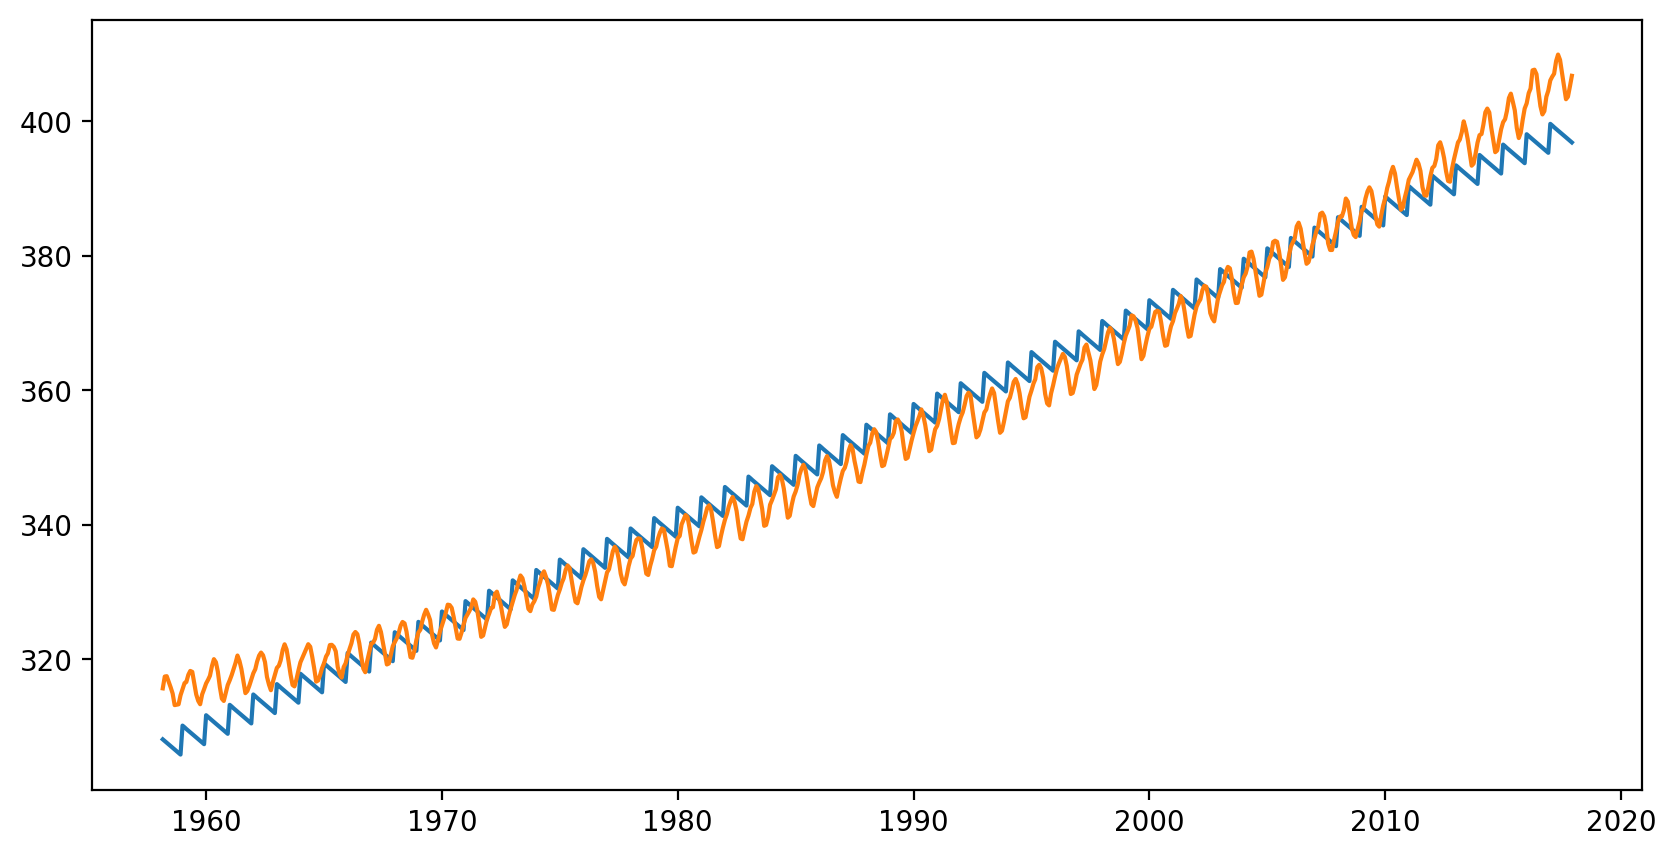

: 

: 

In [ ]:
x = dataset[["year", "month"]].to_numpy()
y = dataset["co2"].to_numpy()

weights = ols(x, y)

plt.plot(dataset.index, apply(weights, x), dataset["co2"])

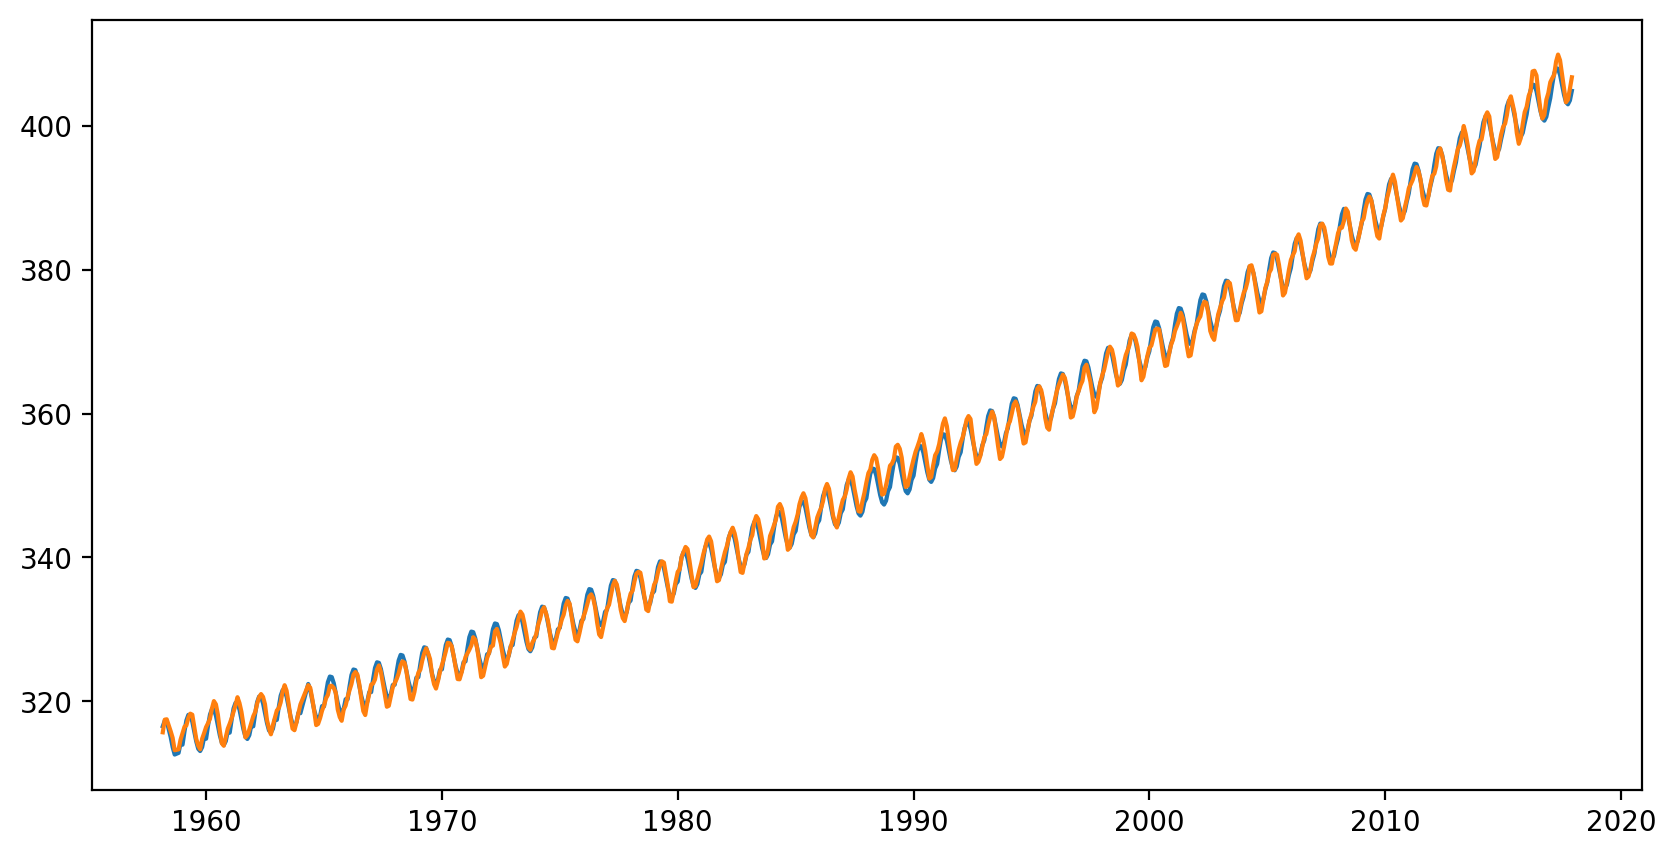

: 

: 

In [ ]:
x = dataset[["year", "year_2", "month", "cos_month", "sin_month"]].to_numpy()
y = dataset["co2"].to_numpy()

weights = ols(x, y)

plt.plot(dataset.index, apply(weights, x), dataset["co2"])